# **Data Analysis**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Enable pandas to show all the columns
pd.pandas.set_option('display.max_columns', None)

In [2]:
dataset = pd.read_csv('./database/train.csv')

print(dataset.shape)
dataset.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# **Types of Features**

1. NaN Value Features

2. Numeical Features:
    * Discrete Feautes
    * Temporal Features
    * Continuous Features
    
    
3. Categorical Features

## **1. NaN Value Features**

In [3]:
features_with_na = [f for f in dataset.columns if dataset[f].isnull().sum() > 1]

na_percent =  [np.round(dataset[feature].isnull().mean(), 4) for feature in features_with_na]
# na_percent =  [np.round(100*(dataset[feature].isnull().sum()/dataset.isnull().sum().sum()), 4) for feature in features_with_na]

print('Total number of Features with NaN values :', len(features_with_na), '\n')

# pd.DataFrame([features_with_na, na_percent])
for feature, percent in zip(features_with_na, na_percent):
    print(f'{feature} {percent} % missing values')

Total number of Features with NaN values : 18 

LotFrontage 0.1774 % missing values
Alley 0.9377 % missing values
MasVnrType 0.0055 % missing values
MasVnrArea 0.0055 % missing values
BsmtQual 0.0253 % missing values
BsmtCond 0.0253 % missing values
BsmtExposure 0.026 % missing values
BsmtFinType1 0.0253 % missing values
BsmtFinType2 0.026 % missing values
FireplaceQu 0.4726 % missing values
GarageType 0.0555 % missing values
GarageYrBlt 0.0555 % missing values
GarageFinish 0.0555 % missing values
GarageQual 0.0555 % missing values
GarageCond 0.0555 % missing values
PoolQC 0.9952 % missing values
Fence 0.8075 % missing values
MiscFeature 0.963 % missing values


### Finding the relationship of these features with the target feature --> SalePrice

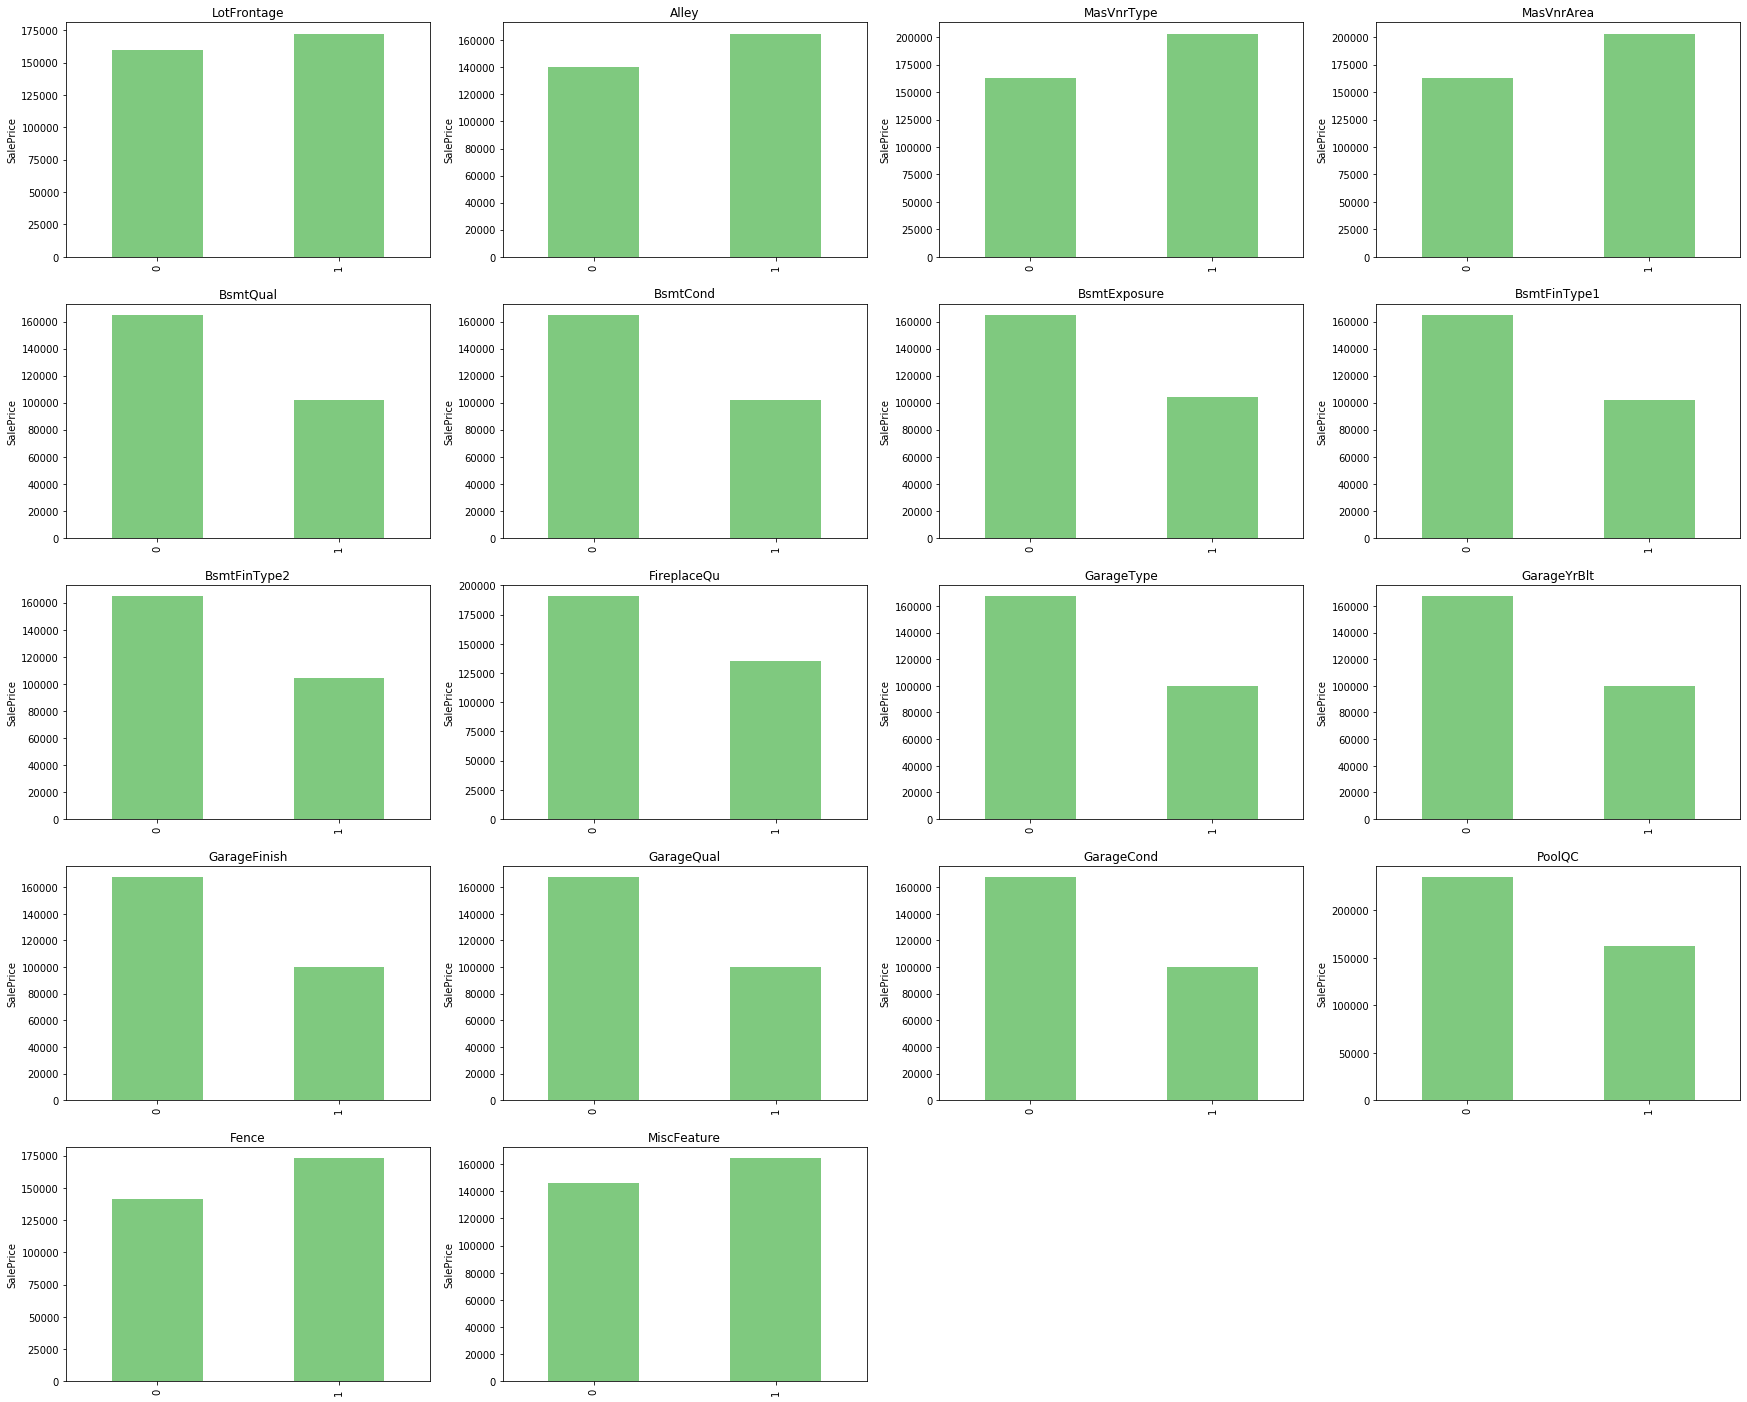

In [4]:
plt.figure(figsize=(30, 25))
for idx, f in enumerate(features_with_na):
    data = dataset.copy()

    data[f] = np.where(data[f].isnull(), 1, 0)
    
    plt.subplot(5, 4, idx+1)
    data.groupby(f)['SalePrice'].median().plot.bar(colormap='Accent')
    plt.title(f)
    plt.ylabel('SalePrice'); plt.xlabel(None)
#     plt.show()

Here, we observe that the SalePrice is high when the NaN median is high. So, it indicates that there is some relation between the target feature and the NaN values. Now, we'll try to fill these NaN vals.

## **2. Numerical features**

In [5]:
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtype != 'O']

print('Total Number of Numerical Features :', len(numerical_features), '\n')

dataset[numerical_features].head()

Total Number of Numerical Features : 38 



,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


We've got our Numerical Features, but...

There are **Temporal Features** also present inside these, like Year/Date/Time etc.

### 2.1. Temporal features

In [6]:
temporal_features = [feature for feature in numerical_features if 'Yr'  in feature or 'Year' in feature]

print('Total Number of Temporal Features :', len(temporal_features), '\n')

for f in temporal_features:
    print(f, '\n', dataset[f].unique(), '\n')

Total Number of Temporal Features : 4 

YearBuilt 
 [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905] 

YearRemodAdd 
 [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974] 

GarageYrBlt 
 [2003. 1976. 2001. 1998. 2000. 1993

**Now, let's find the relationship between these features and the target feature.**

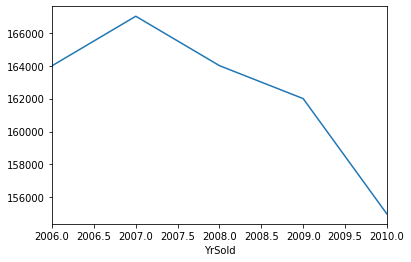

In [7]:
data = dataset.copy()
data.groupby(temporal_features[-1])['SalePrice'].median().plot()
# data.groupby(f)['SalePrice'].mean().plot()

Here, we see a downward trend of House Prices with increase in time, which is highly unlikely scenario. Something is fishy here.

Now, we'll plot all the other temporal_features against 'YrSold' and see if we get something useful out of it or not.

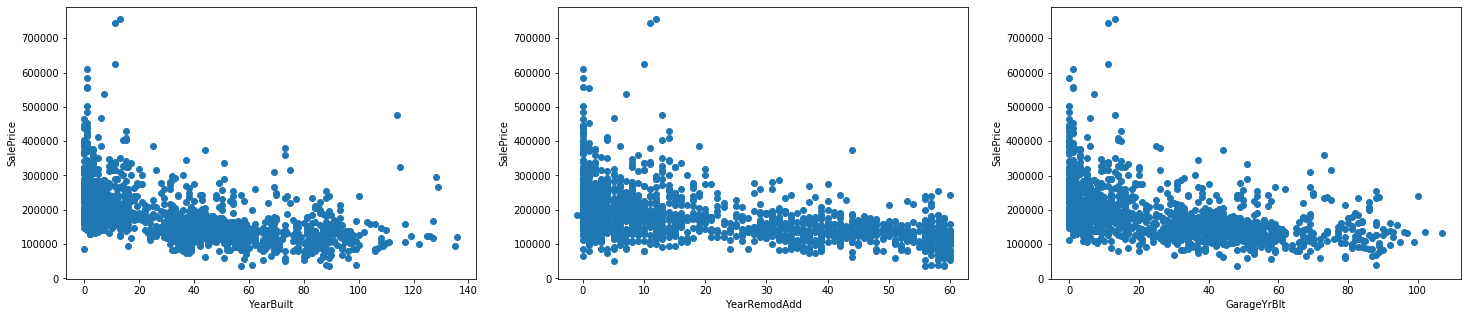

In [8]:
plt.figure(figsize=(25, 5))

# Iterating over the temporal_features:
for idx, f in enumerate(temporal_features):
    if f != 'YrSold':
        # Creating a copy of the dataset
        data = dataset.copy()
        
        plt.subplot(1, 3, idx+1)
        
        # Computing the difference in years
        data[f] = data['YrSold'] - data[f]
        
        # Plotting        
        plt.scatter(data[f], data['SalePrice'])
        plt.xlabel(f); plt.ylabel('SalePrice')
#         plt.show()

*Now it made sense!*

What did we observe from this?

* YearBuilt    : The older the house got, the cheaper it was sold

* YearRemodAdd : The more the time passed after the house was Remodeled, the cheaper it was sold.

* GarageYrBlt  : The older the garage, the lesser the price.

Basically, it's obvious that if the house is old, it'll be sold at a lower price than the house which is new.

Now, let's find out the number of **Discrete Features** in out dataset.

### 2.2. Discrete Features

In [9]:
discrete_features = [f for f in numerical_features[1:] if len(dataset[f].unique()) < 25 and f not in temporal_features and f != 'Id']

print('Total Number of Discrete Features :', len(discrete_features), '\n')

dataset[discrete_features].head()

Total Number of Discrete Features : 17 



,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


Now, let's find the relation of these features with out target feature

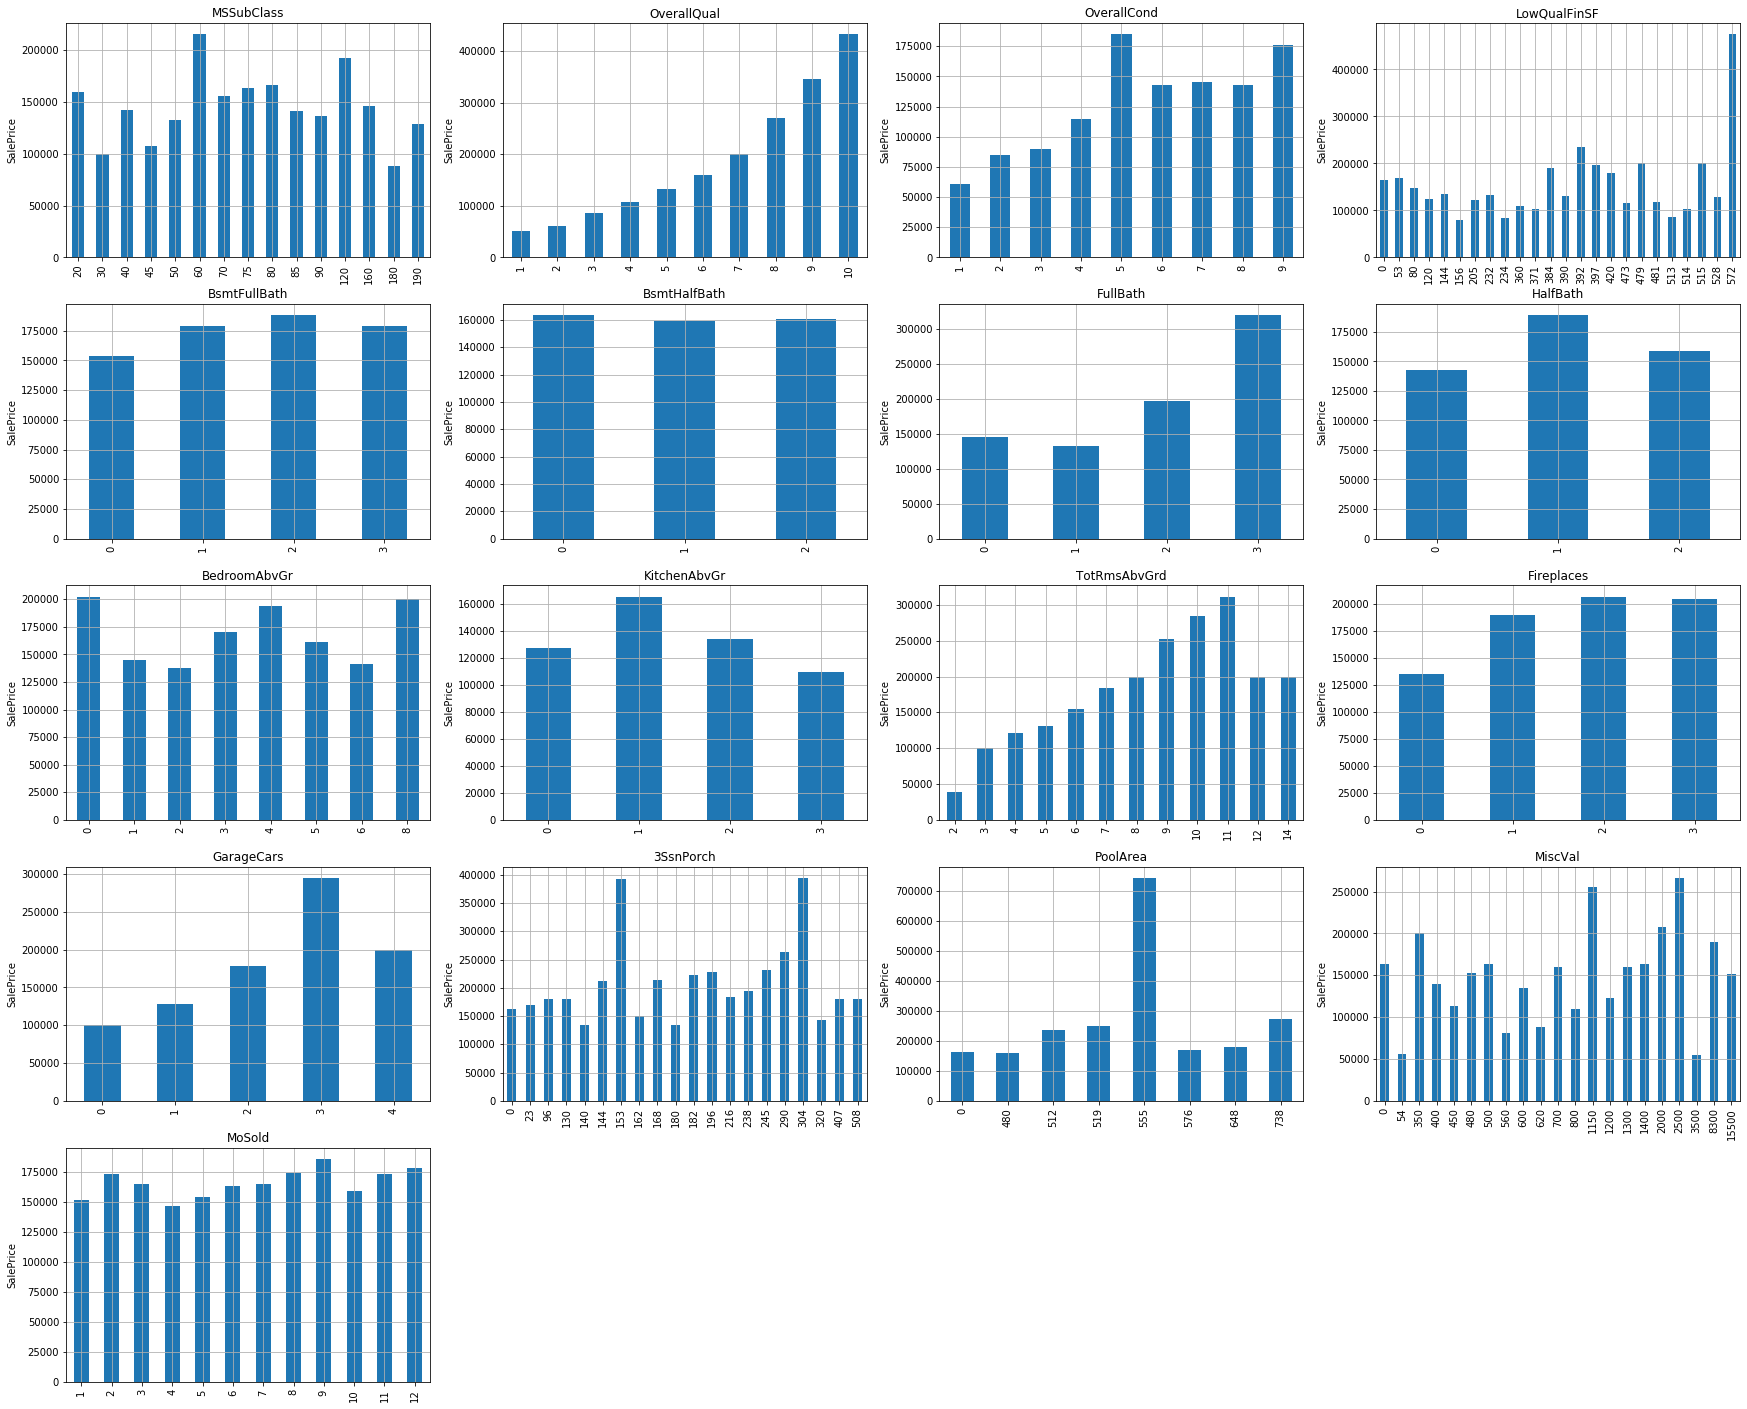

In [10]:
plt.figure(figsize=(30, 25))
for idx, f in enumerate(discrete_features):
    data = dataset.copy()
    
    plt.subplot(5, 4, idx+1)
    data.groupby(f)['SalePrice'].median().plot.bar()
    plt.title(f)
    plt.ylabel('SalePrice')
    plt.xlabel(None)
    plt.grid(1)
#     plt.show()

### 2.3. Continuous Features

In [14]:
continuous_features = [f for f in numerical_features if f not in discrete_features+temporal_features+['Id']]

print('Total Number of Continuous Features :', len(continuous_features), '\n')

dataset[continuous_features].head()

Total Number of Continuous Features : 16 



,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,1717,642,0,35,272,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,2198,836,192,84,0,0,250000


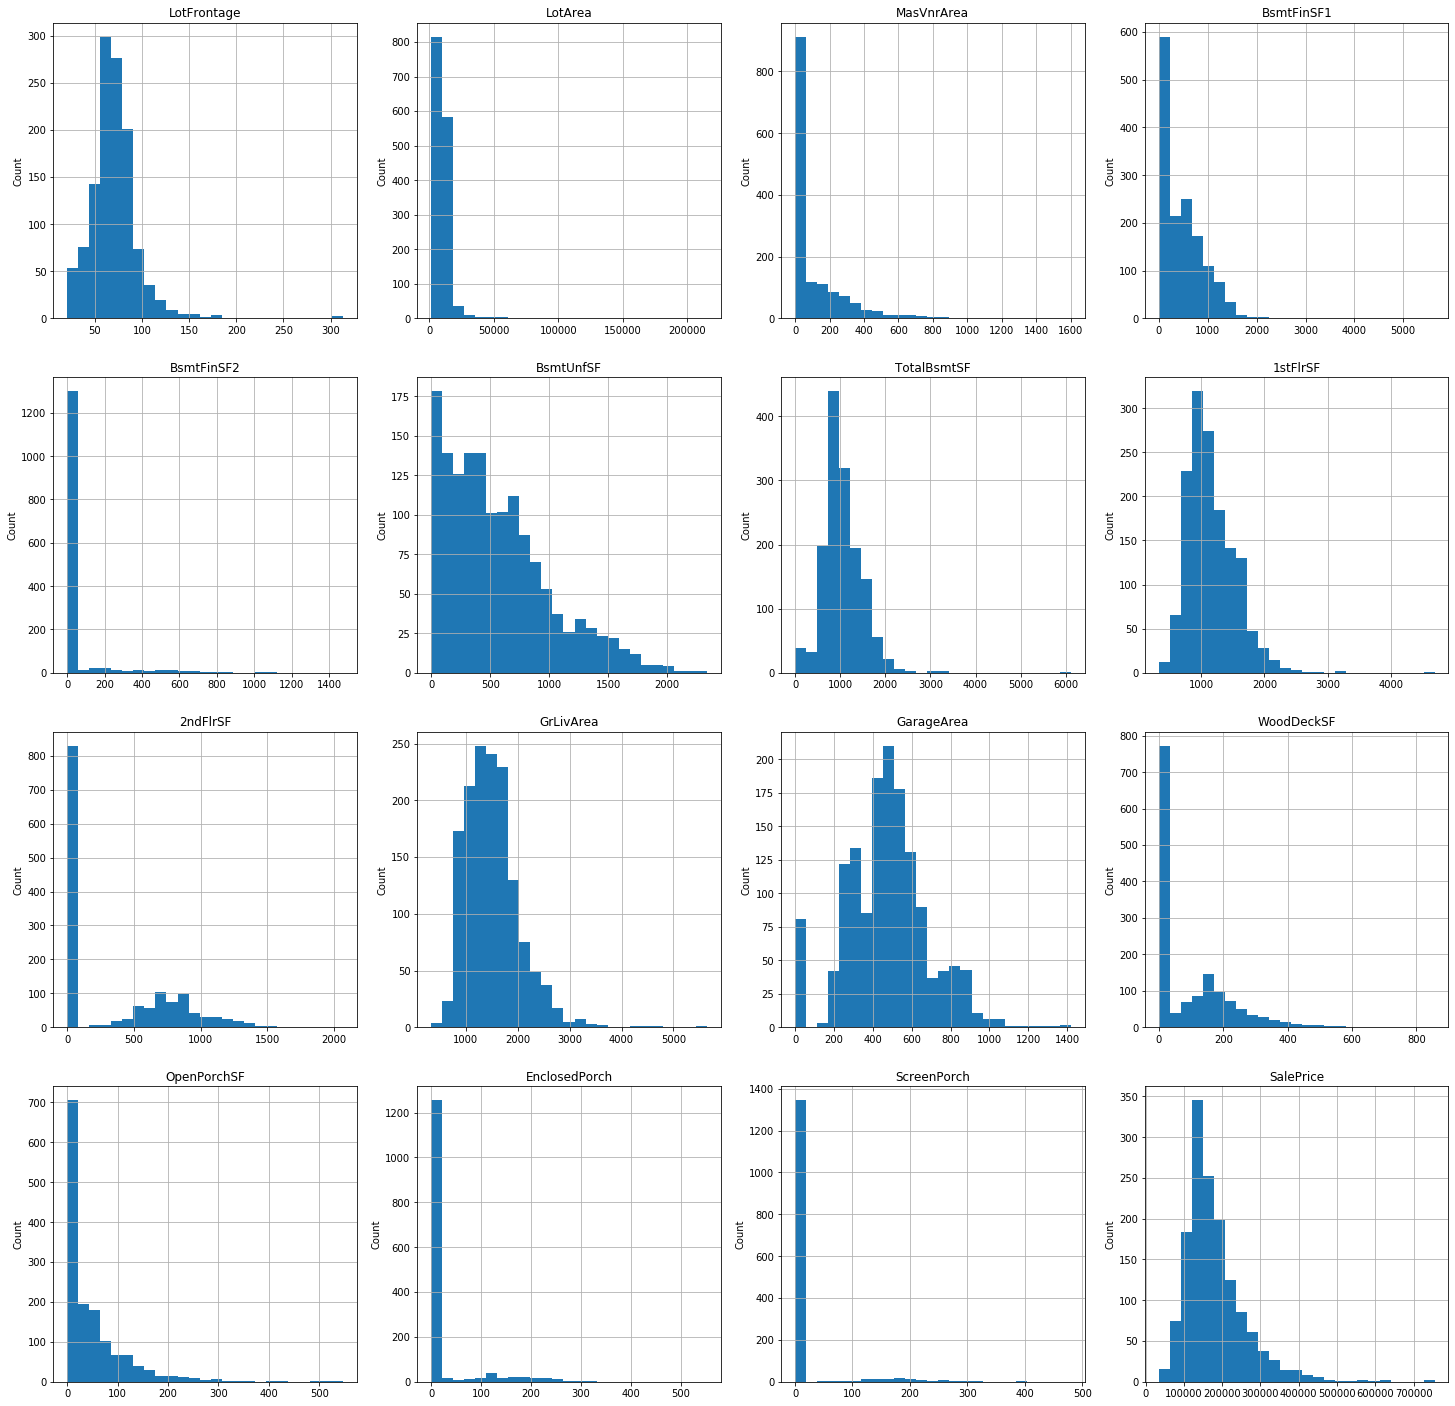

In [22]:
plt.figure(figsize=(25, 25))
for idx, f in enumerate(continuous_features):
    data = dataset.copy()
    
    plt.subplot(4, 4, idx+1)
    data[f].hist(bins=25)
    plt.ylabel('Count')
    plt.title(f)
#     break

We notice that we cannot gather much information about these features because this is a not a Normally distributed dataset (+skewed) with less or no information. Thus, we'll try to **log normalize**

### 2.3.1. Applying **Log Normal Distribution** to the Continuous Features

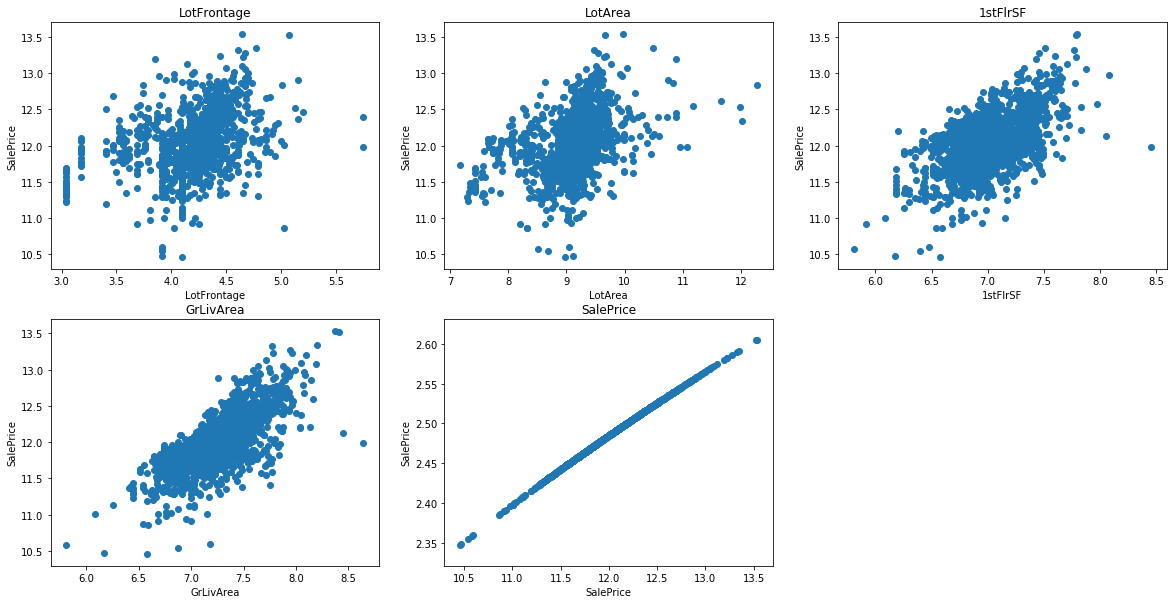

In [46]:
plt.figure(figsize=(20, 10))

idx = 0
for f in continuous_features:
    data = dataset.copy()
    
    if not 0 in data[f].unique(): # We skip the features that have any 0 values because, log(0) = -inf
        data[f] = np.log(data[f])
        
        plt.subplot(2, 3, idx+1)
#         data[f].hist(bins=25)
        plt.scatter(data[f], np.log(data['SalePrice']))
        plt.xlabel(f)
        plt.ylabel('SalePrice')
        plt.title(f)
        idx += 1

Now we get an evenly spread graph to perform analysis on.

* We can see that the plot are showing us a monotonix behaviour (i.e, when the feature is increasing, the SalePrice is also increasing.)
* It is also showing us a positive co-relation

### 2.3.2. **Outliers**

With the help of BoxPlot, we can see the outliers of the continuous features ONLY.

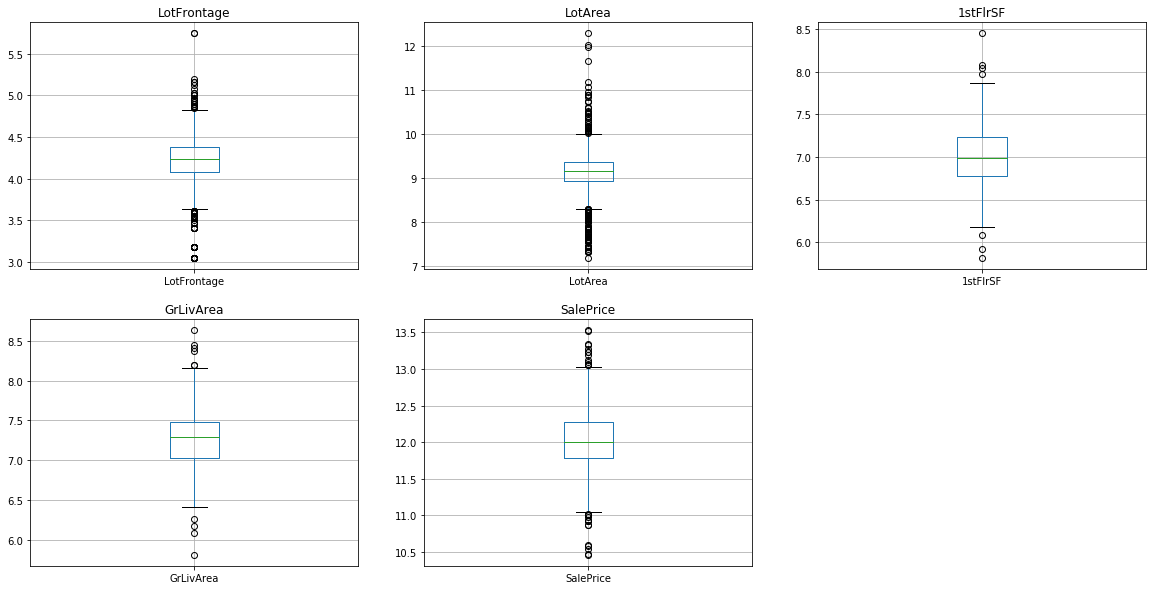

In [70]:
plt.figure(figsize=(20, 10))

idx = 0
for f in continuous_features:
    data = dataset.copy()
    
    if 0 in data[f].unique(): # We skip the features that have any 0 values because, log(0) = -inf
        pass
    else:
        data[f] = np.log(data[f])
        
        plt.subplot(2, 3, idx+1)
        data.boxplot(f)
        plt.title(f)
        plt.grid(1)
        idx += 1

## **3. Categorical Features**

In [77]:
categorical_features = [f for f in dataset.columns if dataset[f].dtypes == 'O']

print('Total Number of Categorical Features :', len(categorical_features), '\n')

data[categorical_features].head()

Total Number of Categorical Features : 43 



,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


First, we'll find the **Cardinal Values** for the features. It seems high-level but it is simply the count of Categories inside each of the categorical feature ;p

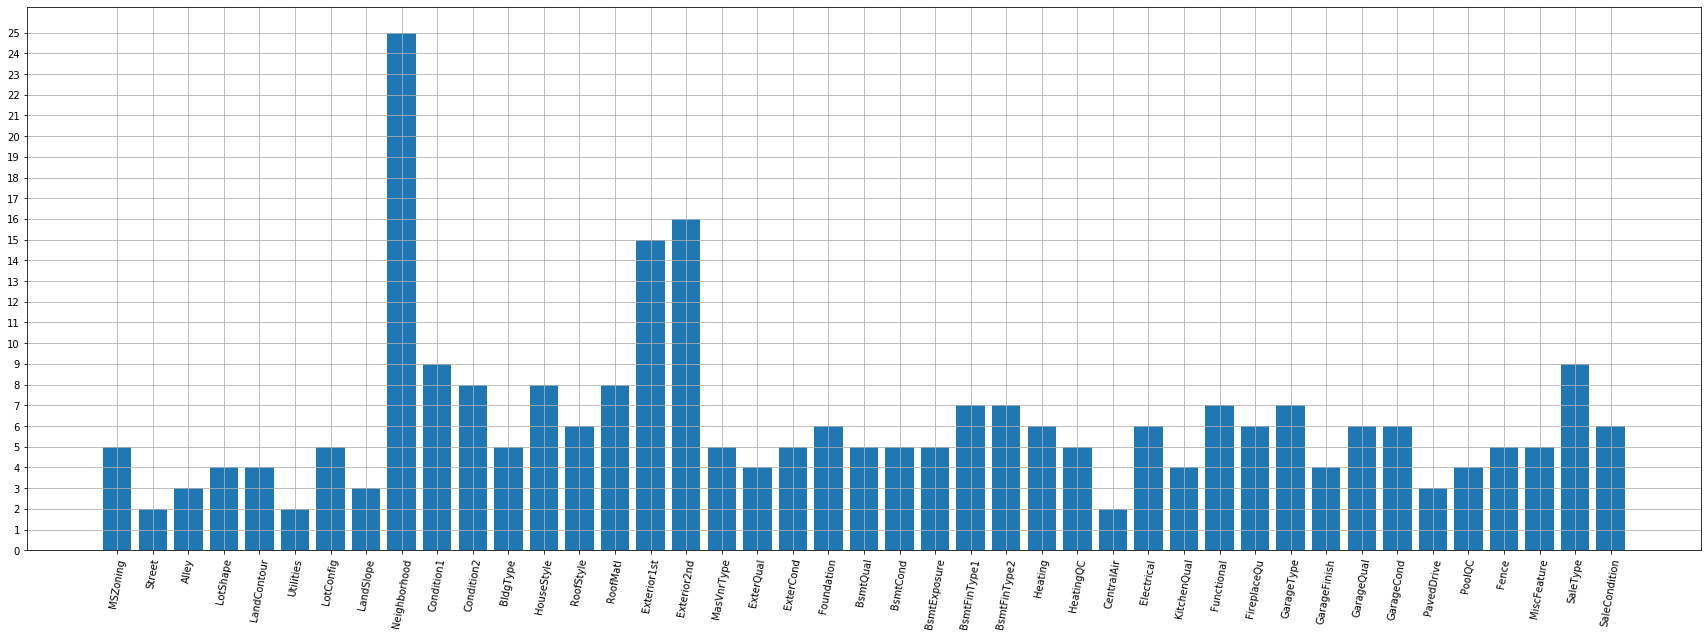

In [89]:
categories = []
for f in categorical_features:
#     print(f'{f} > {len(dataset[f].unique())}')
    categories.append(len(dataset[f].unique()))

plt.figure(figsize=(30, 10))
plt.bar(categorical_features, categories)

plt.yticks(range(0, 26, 1))
plt.xticks(rotation=80)
plt.grid(1)